<a href="https://colab.research.google.com/github/jarangol/ChatRoom/blob/master/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alexander Acosta y Julián Arango

In [0]:
# imports necesarios

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="white")

#Entendimiento del problema



In [0]:
# Dataset original
wines = pd.read_csv("whitewine.csv",sep=";")

feature_names = wines.drop(['quality'],axis=1).columns.values
X = wines.drop(['quality'], axis=1).values

y = wines['quality']

Feature ranking:
1. alcohol (0.127125)
2. volatile acidity (0.101105)
3. density (0.093041)
4. free sulfur dioxide (0.090916)
5. total sulfur dioxide (0.087331)
6. citric acid (0.085161)
7. residual sugar (0.084902)
8. pH (0.084246)
9. chlorides (0.083511)
10. sulphates (0.082946)
11. fixed acidity (0.079716)


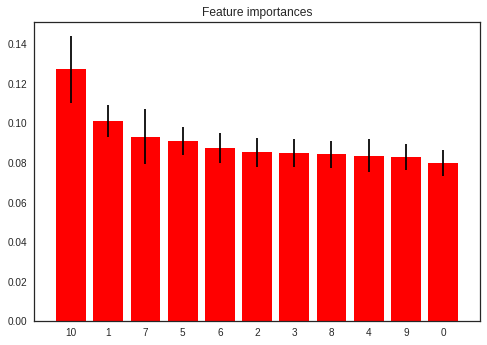

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


# Relación entre las variables de entrada y la salida

# Revisión de la calidad de los datos

Cómo se puede observar en la captura anterior, los datos del dataset utilizado no presentan valores nulos en ninguno de sus campos, es decir, se tienen 4200 registros con 11 variables independientes cada uno. Se hizo un análisis que incluye media, desviación estándar, mínimos, máximos y además los cuartiles para tener una visión general de la distribución de los datos.

Las 11 variables son de tipo numérico y son variables continuas. 




In [0]:
wines.head()

In [0]:
wines.describe()

# Modelos (logístico, árbol y lineal) y evaluación de su desempeño
Para el caso de clasificación binaria se utiliza como límite de calidad el 5, menor o igual a este valor se considera como un vino de mala calidad ( calidad = 0), si es mayor se considera de buena calidad ( calidad = 1).

A continuación mostraremos por qué se escogió el límite en 5, en esta imagen se muestra la distribución de la calidad de los vinos en el dataset utilizado.



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


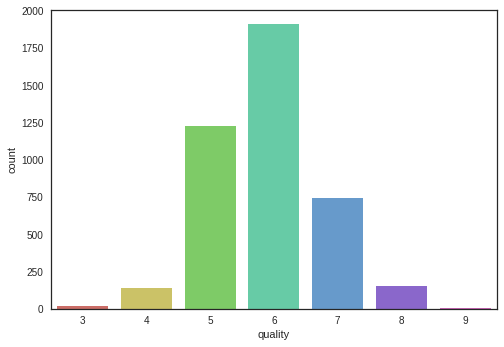

In [0]:
sns.countplot(x="quality",data=wines,palette="hls")
plt.show()


Se utilizaron bosques de árboles (forests of trees) para evaluar la importancia de las 11 variables de los datos, arrojando los siguientes resultados:

## Encontrando límite para calidad binaria


###  Experimento 1 (limite 6)

percentage of poor is 78.47619047619048
percentage of excellent 21.523809523809522


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


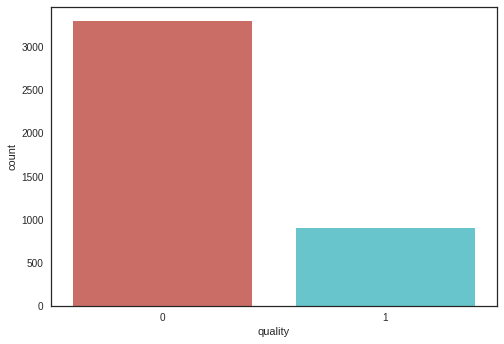

In [0]:
# Se cambia la calificion a binaria
wines_bin = wines.copy()
wines_bin.loc[wines_bin["quality"] <= 6,'quality'] = 0 # quality <= 5 = 0 (malo)
wines_bin.loc[wines_bin["quality"] > 6,'quality'] = 1 # quality > 5 = 1 (bueno)
y_bin = wines_bin['quality'].values

count_poor = len(wines_bin[wines_bin['quality']==0])
count_excellent = len(wines_bin[wines_bin['quality']==1])

pct_of_poor = count_poor/(count_poor+count_excellent)
print("percentage of poor is", pct_of_poor*100)
pct_of_excellent = count_excellent/(count_poor+count_excellent)
print("percentage of excellent", pct_of_excellent*100)

sns.countplot(x="quality",data=wines_bin,palette="hls")
plt.show()

### Experimento 2 (límite 5)

percentage of poor is 32.976190476190474
percentage of excellent 67.02380952380952


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


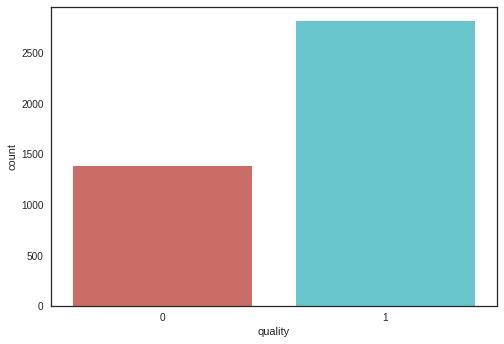

In [0]:
# Se cambia la calificion a binaria
wines_bin = wines.copy()
wines_bin.loc[wines_bin["quality"] <= 5,'quality'] = 0 # quality <= 5 = 0 (malo)
wines_bin.loc[wines_bin["quality"] > 5,'quality'] = 1 # quality > 5 = 1 (bueno)
y_bin = wines_bin['quality'].values

count_poor = len(wines_bin[wines_bin['quality']==0])
count_excellent = len(wines_bin[wines_bin['quality']==1])

pct_of_poor = count_poor/(count_poor+count_excellent)
print("percentage of poor is", pct_of_poor*100)
pct_of_excellent = count_excellent/(count_poor+count_excellent)
print("percentage of excellent", pct_of_excellent*100)

sns.countplot(x="quality",data=wines_bin,palette="hls")
plt.show()

Aunque sigue siendo desequilibrado, este sería el punto más equilibrado para dividir el dataset en dos calidades, buscando la manera de tener los dos grupos balanceados.

## Regresión Lineal

In [0]:
# partición de los datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

28.249712765319767

In [0]:
clf.fit(X_train[:,[10,1,7,5]], y_train)
clf.score(X_test[:,[10,1,7,2]], y_test)*100

22.025045794233712

## Regresión logística:

En este modelo se tomaron todas la variables del problema.

In [0]:
# partición de los datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.25)

In [0]:
clf = linear_model.LogisticRegression(solver="lbfgs")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


73.90476190476191

En este modelo se tomaron las 5 variables con más importancia (según lo mostrado en el punto de entendimiento del problema):
  
  * Alcohol
  * Volatile acidity
  * Density
  * Free sulfur dioxide
  * citric acid

In [0]:
clf = linear_model.LogisticRegression(solver="lbfgs")
clf.fit(X_train[:,[10,1,7,5,2]], y_train)
clf.score(X_test[:,[10,1,7,5,2]], y_test)*100

71.42857142857143

## Árboles de decisión:

<p> En este modelo se tomaron todas la variables del problema.

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

78.38095238095238

<p>En este modelo se modificó el parámetro de profundidad.

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=15)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

80.47619047619048

En este modelo se tomaron las 5 variables con más importancia (según lo mostrado en el punto de entendimiento del problema):
  
  * Alcohol
  * Volatile acidity
  * Density
  * Free sulfur dioxide
  * Citric acid

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train[:,[10,1,7,5,2]], y_train)
clf.score(X_test[:,[10,1,7,5,2]], y_test)*100

76.09523809523809

<p>En este modelo se modificó el parámetro de profundidad y se tomaron las 4 variables con más importancia

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X[:,[10,1,7,5,2]], y_bin)
clf.score(X_test[:,[10,1,7,5,2]], y_test)*100

99.61904761904762

In [0]:
import pickle
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    pickle.dump(clf, fid)    


In [0]:
with open('classifier.pkl', 'rb') as fid:
    gnb_loaded = pickle.load(fid)

In [0]:
predictions = gnb_loaded.predict(X_test[:,[10,1,7,5,2]])

In [0]:
predictions

array([1, 1, 1, ..., 0, 1, 1])

# Escogencia del umbral de probabilidad en clasificación y justificarlo